In [53]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm

In [54]:
def accel(t):
    return np.sin(t)
    # return 1

def rand_accel_bias(sigma_squared=1e-6):
    return np.random.normal(0, np.sqrt(sigma_squared))

def rand_accel_noise(sigma_squared=2.5e-3):
    return np.random.normal(0, np.sqrt(sigma_squared))

In [55]:
A = np.array([
    [0, 1],
    [0, 0]
])
# vector is x, v

B = np.array([
    [0],
    [1]
])
# vector is a

zeta = 2.5e-3
Q = np.eye(2) * zeta
P = np.eye(2)
T = 500
dt = 0.01 # 100 Hz
A = expm(A*dt)

In [56]:
xvec = np.array([0, 0]) # x, v, b
actual_xvec = np.array([0, 0])

u = np.array([0])
actual_u = np.array([0])

simulation = []
actual_simulation = []
simulation.append([xvec[0], xvec[1], 0, P[0,0], P[1,1]]) # x, v, a, P1, P2
actual_simulation.append([actual_xvec[0], actual_xvec[1], 0])

In [57]:
# Kalman filter
bias = 0
for _ in range(int(T/dt)):
    accel_input = accel(_/T)
    actual_u = np.array([accel_input])
    actual_xvec = A @ actual_xvec + B @ actual_u

    u = np.array([accel_input + bias + rand_accel_noise()])
    xvec = A @ xvec + B @ u
    
    bias += rand_accel_bias()

    P = A @ P @ A.T + dt*Q
    
    if _ % int(1/dt) == 0:
        # Save values
        simulation.append([xvec[0], xvec[1], u[0], P[0,0], P[1,1]]) # x, v, a, P1, P2
        actual_simulation.append([actual_xvec[0], actual_xvec[1], actual_u[0]])

Text(0.5, 1.0, 'Velocity')

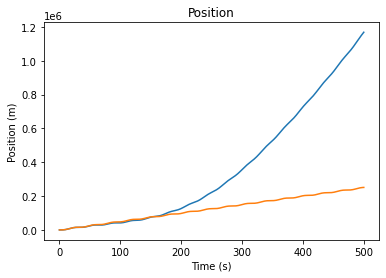

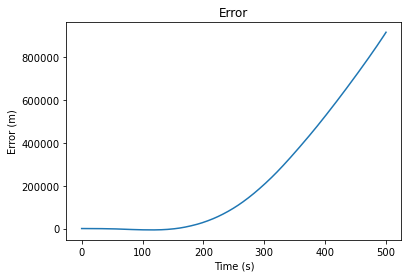

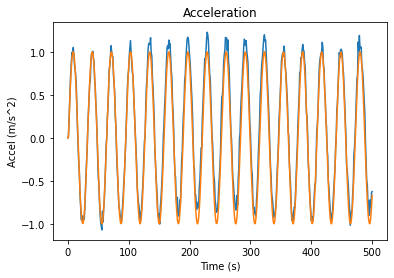

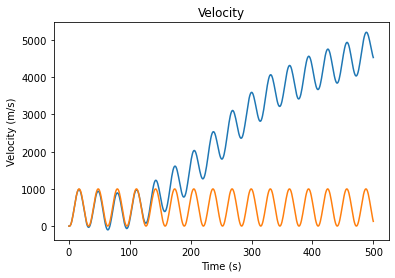

In [58]:
simulation = np.array(simulation, dtype=np.float32) # x, v, b, a, P1, P2
actual_simulation = np.array(actual_simulation, dtype=np.float32)
error = simulation[:,0] - actual_simulation[:,0]
Tf = np.linspace(0, T, T+1)

plt.figure(1)
plt.plot(Tf, simulation[:,0])
plt.plot(Tf, actual_simulation[:,0])
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
plt.title("Position")

plt.figure(2)
plt.plot(Tf, error)
plt.xlabel("Time (s)")
plt.ylabel("Error (m)")
plt.title("Error")

plt.figure(3)
# plt.plot(Tf, simulation[:,3])
# plt.plot(Tf, actual_simulation[:,3])
plt.plot(Tf, simulation[:,2])
plt.plot(Tf, actual_simulation[:,2])
plt.xlabel("Time (s)")
plt.ylabel("Accel (m/s^2)")
plt.title("Acceleration")

plt.figure(4)
plt.plot(Tf, simulation[:,1])
plt.plot(Tf, actual_simulation[:,1])
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")
plt.title("Velocity")

Text(0.5, 1.0, '2nd Diagonal Term in P')

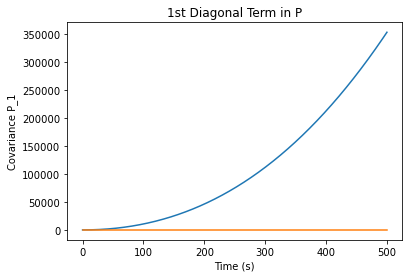

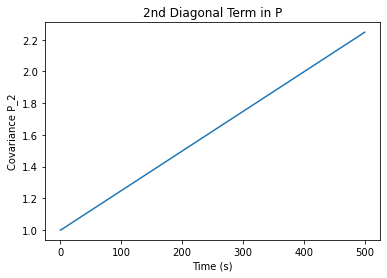

In [59]:
plt.figure(6)
plt.plot(Tf, simulation[:,3])
plt.plot(Tf, simulation[:,4])
plt.xlabel("Time (s)")
plt.ylabel("Covariance P_1")
plt.title("1st Diagonal Term in P")

plt.figure(7)
# plt.plot(Tf, simulation[:,5])
plt.plot(Tf, simulation[:,4])
plt.xlabel("Time (s)")
plt.ylabel("Covariance P_2")
plt.title("2nd Diagonal Term in P")
